# Install Environment

In [ ]:
!pip install datasets
!pip install transformers[torch]

import os
import pandas as pd
import torch
import transformers as tr
from datasets import Dataset, load_metric
from sklearn.model_selection import train_test_split
import numpy as np
from transformers import Trainer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.9 MB/s eta 0:00:00


# Data Importing

In [ ]:
def read_data():
    # GonzaloA data         #Hugging Face
    gonzaloa_train = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/GonzaloA_fake_news/train.csv"
    )  # 20000 row      0 = fake, 1 = real

    gonzaloa_test = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/GonzaloA_fake_news/test.csv"
    )  # 6284 row    0 = fake, 1 = real

    # ErfanMoosaviMonzzah       #Hugging Face
    Erfan_train = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/ErfanMoosaviMonazzah/train.csv"
    )  # 20000 row      0 = fake, 1 = real

    Erfan_test = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/ErfanMoosaviMonazzah/test.csv"
    )  # 18254 row      0 = fake, 1 = real

    # IFND              #Kaggle
    IFND_train = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/IFND/train.csv"
    )  # 20000 row      0 = fake, 1 = real

    IFND_test = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/IFND/test.csv"
    )  # 36340 row      0 = fake, 1 = real

    # kaggle_datafake           #Kaggle
    kaggle_train = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/kaggle_datafake/train.csv"
    )  # 20000 row      0 = fake, 1 = real

    kaggle_test = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/kaggle_datafake/test.csv"
    )  # 251065 row     0 = fake, 1 = real

    # pushpdeepfake_news_combined       #Hugging Face
    pushpdeepfake_train = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/pushpdeepfake_news_combined/train.csv"
    )  # 20000 row      0 = fake, 1 = real

    pushpdeepfake_test = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/pushpdeepfake_news_combined/test.csv"
    )  # 19094 row      0 = fake, 1 = real




####################################################################################################
    FAKES = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/FA-KES-Dataset.csv"
    )  # 804 row      0 = fake, 1 = real
    FAKES = FAKES[["text", "label"]]

    # news_articles
    news_articles = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/news_articles.csv"
    )  # 2046 row       0 = fake, 1 = real
    news_articles = news_articles[["text", "label"]]

    news_articles_cleaned = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/news_articles_cleaned.csv"
    )  # 1660 row       0 = fake, 1 = real
    news_articles_cleaned = news_articles_cleaned[["text", "label"]]

    news_articles_source = pd.read_csv(
        "https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/FAKE-REAL/DATA/news_articles_source.csv"
    )  # 2050 row      0 = fake, 1 = real
    news_articles_source = news_articles_source[["text", "label"]]

    return (
        gonzaloa_train,
        gonzaloa_test,
        Erfan_train,
        Erfan_test,
        IFND_train,
        IFND_test,
        kaggle_train,
        kaggle_test,
        pushpdeepfake_train,
        pushpdeepfake_test,
        # FAKES,
        # news_articles,
        # news_articles_cleaned,
        # news_articles_source,
    )

In [ ]:
(
    gonzaloa_train,
    gonzaloa_test,
    Erfan_train,
    Erfan_test,
    IFND_train,
    IFND_test,
    kaggle_train,
    kaggle_test,
    pushpdeepfake_train,
    pushpdeepfake_test,
    FAKES,
    news_articles,
    news_articles_cleaned,
    news_articles_source,
) = read_data()

# First Trial

## Data Combination

In [ ]:
training_data = Erfan_train

dataset = Dataset.from_pandas(training_data)
dataset = dataset.train_test_split(test_size=0.2)
# dataset["train"]["label"]

## Fine Tuning


In [ ]:
def to_tokens(tokenizer, label_map):
    def apply(x):
        target_labels = [label_map[y] for y in x["label"]]
        token_res = tokenizer(
            x["text"],
            text_target=target_labels,
            return_tensors="pt",
            truncation=True,
            padding=True,
        )
        return token_res

    return apply

In [ ]:
tokenizer = tr.AutoTokenizer.from_pretrained("t5-large")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
label_lookup = {0: "fake", 1: "real"}
to_tokens = to_tokens(tokenizer, label_lookup)
tokenized_dataset = dataset.map(
    to_tokens, batched=True, remove_columns=["text", "label"]
)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
local_training_root = "./"
checkpoint_name = "test-trainer"
local_checkpoint_path = os.path.join(local_training_root, checkpoint_name)
training_args = tr.TrainingArguments(
    local_checkpoint_path,
    num_train_epochs=1,  # default number of epochs to train is 3
    per_device_train_batch_size=16,
    optim="adamw_torch",
    report_to=["tensorboard"],
)

In [ ]:
t5_model = tr.AutoModelForSeq2SeqLM.from_pretrained("t5-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
metric = load_metric("accuracy")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = [
        tokenizer.decode(p, skip_special_tokens=True)
        for p in predictions.argmax(dim=-1)
    ]
    labels = [label_lookup[l] for l in labels]

    return metric.compute(predictions=predictions, references=labels)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=t5_model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
)
trainer.train()

Step,Training Loss
500,0.541900
1000,0.009300


TrainOutput(global_step=1000, training_loss=0.27562592124938967, metrics={'train_runtime': 499.0219, 'train_samples_per_second': 32.063, 'train_steps_per_second': 2.004, 'total_flos': 2165468823552000.0, 'train_loss': 0.27562592124938967, 'epoch': 1.0})

In [ ]:
# trainer.evaluate()
trainer.save_model()
trainer.save_state()
checkpoint_name = "test-trainer-deepspeed"
final_model_path = f"./llm04_fine_tuning/{checkpoint_name}"

trainer.save_model(output_dir=final_model_path)

fine_tuned_model = tr.AutoModelForSeq2SeqLM.from_pretrained(final_model_path)

## Evaluation

### Data Cleaning and sampling

In [ ]:
def clean_sample(df, n):
    temp = df.groupby("label", group_keys=False).apply(lambda x: x.sample(n))
    temp = temp.sample(frac=1, random_state=42)
    temp.dropna(subset=["text", "label"], inplace=True)
    temp["label"].replace({0: "fake", 1: "real"}, inplace=True)
    return temp

In [ ]:
def evaluate_data(df, n=200):
    temp = clean_sample(df, n)

    # Initialize an empty list to store the predictions
    predictions = []

    # Iterate through each row in the DataFrame
    for index, row in temp.iterrows():
        text = row["text"]
        news_report = [text]  # Create a list with the text from the DataFrame

        # Tokenize and generate predictions
        inputs = tokenizer(
            news_report, return_tensors="pt", truncation=True, padding=True
        )
        pred = fine_tuned_model.generate(
            input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"]
        )

        # Decode the predictions and store them in the predictions list
        classification = tokenizer.batch_decode(pred, skip_special_tokens=True)[0]
        predictions.append(classification)

    # Add the predictions to the DataFrame as a new column
    temp["predictions"] = predictions

    classification_rep = classification_report(temp["label"], temp["predictions"])
    print("Classification Report:")
    print(classification_rep)

    accuracy = accuracy_score(temp["label"], temp["predictions"])

    return accuracy, temp

### Evaluation on the samples

In [ ]:
gonzaloa_train_accuracy, gonzaloa_train_sample = evaluate_data(gonzaloa_train)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

       enjoy       0.00      0.00      0.00         0
        fake       0.99      0.94      0.97       200
        real       0.95      0.99      0.97       200

    accuracy                           0.97       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.97      0.97      0.97       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gonzaloa_test_accuracy, gonzaloa_test_sample = evaluate_data(gonzaloa_test)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.97      0.93      0.95       200
        real       0.93      0.97      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
Erfan_test_accuracy, Erfan_test_sample = evaluate_data(Erfan_test)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
IFND_train_accuracy, IFND_train_sample = evaluate_data(IFND_train)

In [ ]:
IFND_test_accuracy, IFND_test_sample = evaluate_data(IFND_test)

In [ ]:
kaggle_train_accuracy, kaggle_train_sample = evaluate_data(kaggle_train)

In [ ]:
kaggle_test_accuracy, kaggle_test_sample = evaluate_data(kaggle_test)

In [ ]:
pushpdeepfake_train_accuracy, pushpdeepfake_train_sample = evaluate_data(
    pushpdeepfake_train
)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.98      0.99      0.98       200
        real       0.99      0.97      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
pushpdeepfake_test_accuracy, pushpdeepfake_test_sample = evaluate_data(
    pushpdeepfake_test
)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       200
        real       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
FAKES_accuracy, FAKES_sample = evaluate_data(FAKES)

In [ ]:
news_articles_accuracy, news_articles_sample = evaluate_data(news_articles)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.51      0.79      0.62       200
        real       0.55      0.26      0.35       200

    accuracy                           0.52       400
   macro avg       0.53      0.52      0.49       400
weighted avg       0.53      0.52      0.49       400



In [ ]:
news_articles_cleaned_accuracy, news_articles_cleaned_sample = evaluate_data(
    news_articles_cleaned
)

In [ ]:
news_articles_source_accuracy, news_articles_source_sample = evaluate_data(
    news_articles_source
)

### Bar Chart

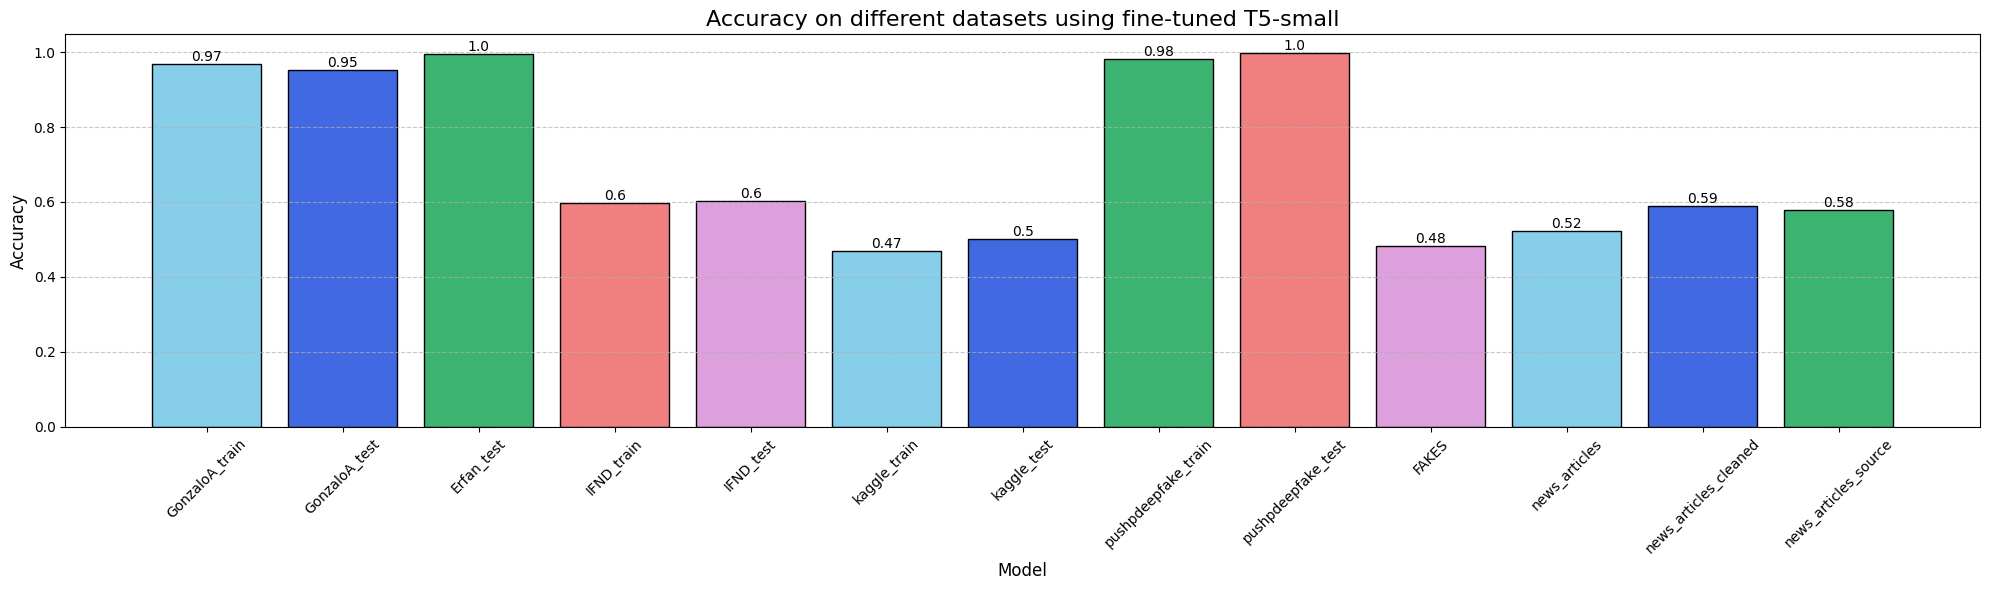

In [ ]:
import matplotlib.pyplot as plt

# Model labels
models = [
    "GonzaloA_train",
    "GonzaloA_test",
    "Erfan_test",
    "IFND_train",
    "IFND_test",
    "kaggle_train",
    "kaggle_test",
    "pushpdeepfake_train",
    "pushpdeepfake_test",
    "FAKES",
    "news_articles",
    "news_articles_cleaned",
    "news_articles_source",
]

# Accuracy values
accuracies = [
    gonzaloa_train_accuracy,
    gonzaloa_test_accuracy,
    Erfan_test_accuracy,
    IFND_train_accuracy,
    IFND_test_accuracy,
    kaggle_train_accuracy,
    kaggle_test_accuracy,
    pushpdeepfake_train_accuracy,
    pushpdeepfake_test_accuracy,
    FAKES_accuracy,
    news_articles_accuracy,
    news_articles_cleaned_accuracy,
    news_articles_source_accuracy,
]

colors = [
    "skyblue",
    "royalblue",
    "mediumseagreen",
    "lightcoral",
    "plum",
    "skyblue",
    "royalblue",
    "mediumseagreen",
    "lightcoral",
    "plum",
    "skyblue",
    "royalblue",
    "mediumseagreen",
]

# Create the bar plot
plt.figure(figsize=(20, 6))
bars = plt.bar(models, accuracies, color=colors, edgecolor="black")

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        va="bottom",
        ha="center",
    )

plt.title("Accuracy on different datasets using fine-tuned T5-small", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Adding a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Second Trial

### Data Importing

In [ ]:
(
    gonzaloa_train,
    gonzaloa_test,
    Erfan_train,
    Erfan_test,
    IFND_train,
    IFND_test,
    kaggle_train,
    kaggle_test,
    pushpdeepfake_train,
    pushpdeepfake_test
) = read_data()

### Data Combination

In [ ]:
training_data = pd.concat([kaggle_train, Erfan_train, IFND_train], ignore_index=True)


dataset = Dataset.from_pandas(training_data)
dataset = dataset.train_test_split(test_size=0.2)
# dataset["train"]["label"]

## Fine Tuning


In [ ]:
def to_tokens(tokenizer, label_map):
    def apply(x):
        target_labels = [label_map[y] for y in x["label"]]
        token_res = tokenizer(
            x["text"],
            text_target=target_labels,
            return_tensors="pt",
            truncation=True,
            padding=True,
        )
        return token_res

    return apply

In [ ]:
tokenizer = tr.AutoTokenizer.from_pretrained("t5-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
label_lookup = {0: "fake", 1: "real"}
to_tokens = to_tokens(tokenizer, label_lookup)
tokenized_dataset = dataset.map(
    to_tokens, batched=True, remove_columns=["text", "label"]
)

Map:   0%|          | 0/48000 [00:00<?, ? examples/s]

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

In [ ]:
local_training_root = "./"
checkpoint_name = "test-trainer"
local_checkpoint_path = os.path.join(local_training_root, checkpoint_name)
training_args = tr.TrainingArguments(
    local_checkpoint_path,
    num_train_epochs=1,  # default number of epochs to train is 3
    per_device_train_batch_size=16,
    optim="adamw_torch",
    report_to=["tensorboard"],
)

In [ ]:
t5_model = tr.AutoModelForSeq2SeqLM.from_pretrained("t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
metric = load_metric("accuracy")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = [
        tokenizer.decode(p, skip_special_tokens=True)
        for p in predictions.argmax(dim=-1)
    ]
    labels = [label_lookup[l] for l in labels]

    return metric.compute(predictions=predictions, references=labels)

<ipython-input-10-1bce426d05f6>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=t5_model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
)
trainer.train()

Step,Training Loss
500,0.840900
1000,0.112000
1500,0.077300
2000,0.063100
2500,0.058800
3000,0.062600


TrainOutput(global_step=3000, training_loss=0.20246302032470703, metrics={'train_runtime': 1436.5718, 'train_samples_per_second': 33.413, 'train_steps_per_second': 2.088, 'total_flos': 6496406470656000.0, 'train_loss': 0.20246302032470703, 'epoch': 1.0})

In [ ]:
# trainer.evaluate()
trainer.save_model()
trainer.save_state()
checkpoint_name = "test-trainer-deepspeed"
final_model_path = f"./llm04_fine_tuning/{checkpoint_name}"

trainer.save_model(output_dir=final_model_path)

fine_tuned_model = tr.AutoModelForSeq2SeqLM.from_pretrained(final_model_path)

## Evaluation

### Evaluation on the samples

In [ ]:
gonzaloa_train_accuracy, gonzaloa_train_samples = evaluate_data(gonzaloa_train)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.79      0.86       200
        real       0.82      0.96      0.88       200

    accuracy                           0.87       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



In [ ]:
gonzaloa_test_accuracy, gonzaloa_test_samples = evaluate_data(gonzaloa_test)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.78      0.86       200
        real       0.81      0.97      0.88       200

    accuracy                           0.87       400
   macro avg       0.89      0.87      0.87       400
weighted avg       0.89      0.87      0.87       400



In [ ]:
Erfan_test_accuracy, Erfan_test_samples = evaluate_data(Erfan_test)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.98      0.98      0.98       200
        real       0.98      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
IFND_test_accuracy, IFND_test_samples = evaluate_data(IFND_test)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.99      0.94      0.96       200
        real       0.94      0.99      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
kaggle_test_accuracy, kaggle_test_samples = evaluate_data(kaggle_test)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.97      0.96      0.97       200
        real       0.97      0.97      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
pushpdeepfake_train_accuracy, pushpdeepfake_train_samples = evaluate_data(
    pushpdeepfake_train
)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.83      0.98      0.90       200
        real       0.98      0.80      0.88       200

    accuracy                           0.89       400
   macro avg       0.91      0.89      0.89       400
weighted avg       0.91      0.89      0.89       400



In [ ]:
pushpdeepfake_test_accuracy, pushpdeepfake_test_samples = evaluate_data(
    pushpdeepfake_test
)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        fake       0.86      0.99      0.92       200
        real       0.99      0.83      0.91       200

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.91       400
weighted avg       0.93      0.92      0.91       400



### Bar Chart

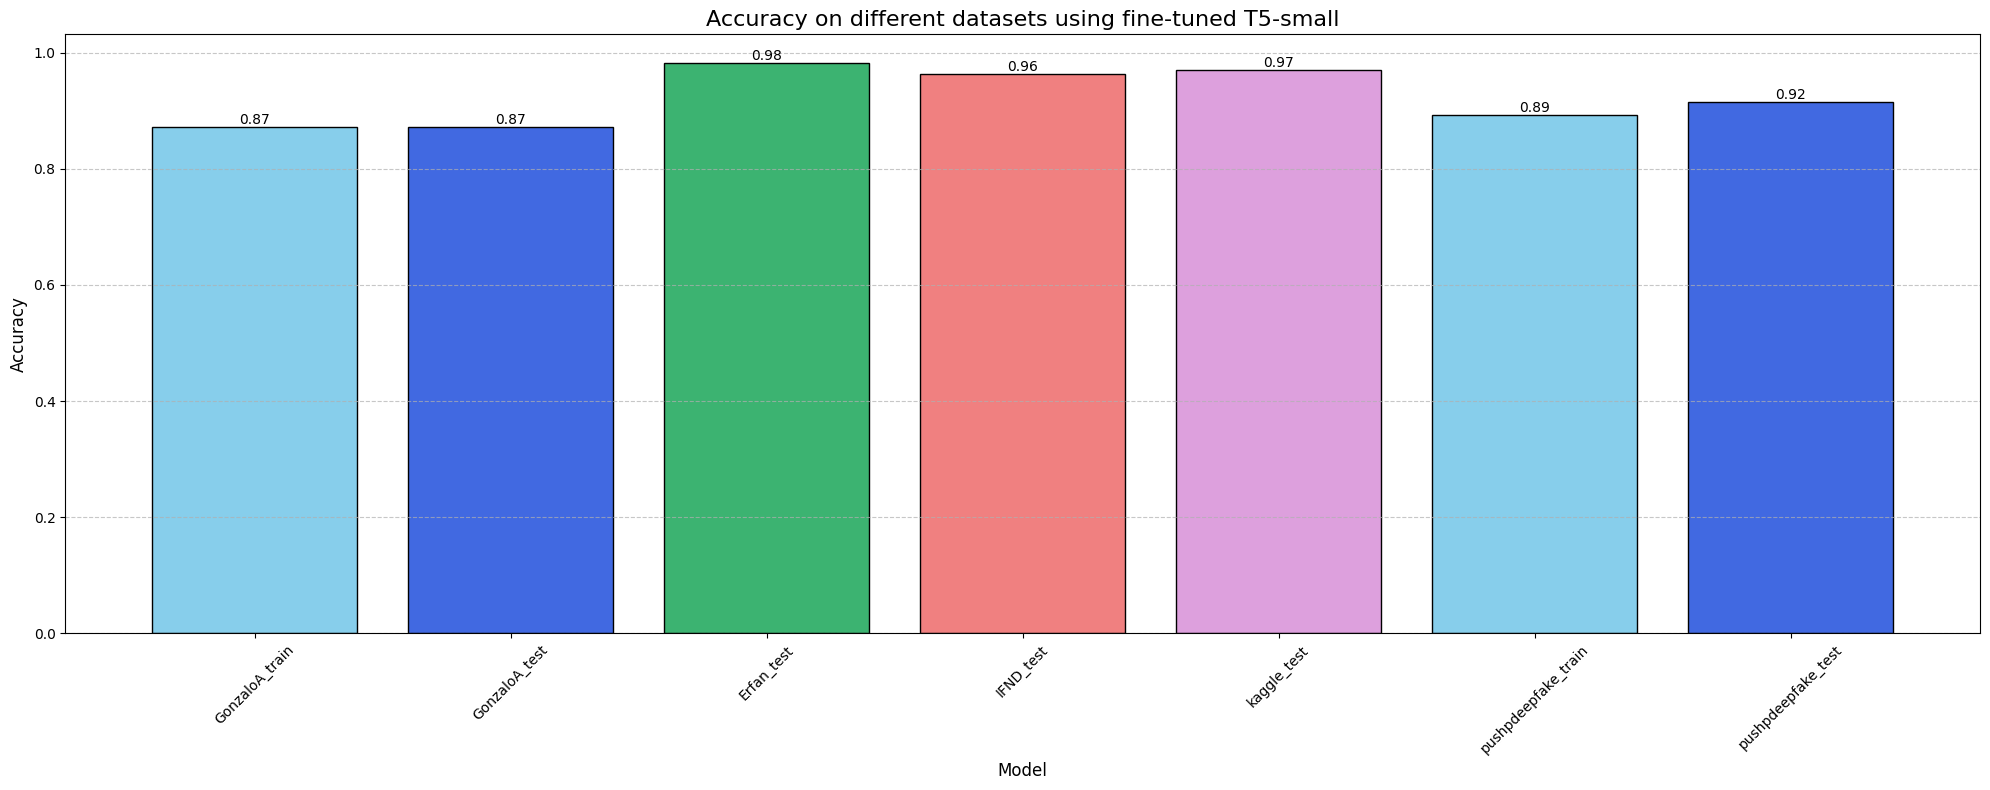

In [ ]:
import matplotlib.pyplot as plt

# Model labels
models = [
    "GonzaloA_train",
    "GonzaloA_test",
    "Erfan_test",
    "IFND_test",
    "kaggle_test",
    "pushpdeepfake_train",
    "pushpdeepfake_test"
]

# Accuracy values
accuracies = [
    gonzaloa_train_accuracy,
    gonzaloa_test_accuracy,
    Erfan_test_accuracy,
    IFND_test_accuracy,
    kaggle_test_accuracy,
    pushpdeepfake_train_accuracy,
    pushpdeepfake_test_accuracy
]

colors = [
    "skyblue",
    "royalblue",
    "mediumseagreen",
    "lightcoral",
    "plum",
    "skyblue",
    "royalblue"
]

# Create the bar plot
plt.figure(figsize=(20, 8))
bars = plt.bar(models, accuracies, color=colors, edgecolor="black")

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        va="bottom",
        ha="center",
    )

plt.title("Accuracy on different datasets using fine-tuned T5-small", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Adding a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()